# IMPORT PACKAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# IMPORT DATA

In [2]:
# Coba baca berkas dengan pengkodean yang berbeda, seperti 'latin-1'
df = pd.read_csv('Jumlah Keberangkatan Penumpang Pelabuhan Tanjung Perak.csv', encoding='latin-1')
df['Bulan'] = pd.to_datetime(df['Bulan'])
df.set_index('Bulan', inplace=True)

# Tampilkan DataFrame
print(df)

            Jumlah Keberangkatan Penumpang  DummyBulanIdulFitri  \
Bulan                                                             
2014-01-01                         22103.0                  0.0   
2014-02-01                         23436.0                  0.0   
2014-03-01                         25760.0                  0.0   
2014-04-01                         17508.0                  0.0   
2014-05-01                         19552.0                  0.0   
...                                    ...                  ...   
2023-08-01                         74782.0                  0.0   
2023-09-01                         63942.0                  0.0   
2023-10-01                         68093.0                  0.0   
2023-11-01                         53545.0                  0.0   
2023-12-01                         46329.0                  0.0   

           DummyIdulFitri DummyIdulAdha  DummyBulanIdulAdha  
Bulan                                                        
2014

In [4]:
# Menambahkan kolom 'Time' sebagai variabel waktu (indeks waktu)
df['Time'] = range(1, len(df) + 1)  # Variabel time dimulai dari 1 hingga jumlah total data

print(df)  # Menampilkan semua baris data (hati-hati jika datanya besar)


            Jumlah Keberangkatan Penumpang  DummyBulanIdulFitri  \
Bulan                                                             
2014-01-01                         22103.0                  0.0   
2014-02-01                         23436.0                  0.0   
2014-03-01                         25760.0                  0.0   
2014-04-01                         17508.0                  0.0   
2014-05-01                         19552.0                  0.0   
...                                    ...                  ...   
2023-08-01                         74782.0                  0.0   
2023-09-01                         63942.0                  0.0   
2023-10-01                         68093.0                  0.0   
2023-11-01                         53545.0                  0.0   
2023-12-01                         46329.0                  0.0   

           DummyIdulFitri DummyIdulAdha  DummyBulanIdulAdha  Time  
Bulan                                                       

# Pembagian Data

In [5]:
# Membagi data menjadi insample (96 data pertama) dan outsample (12 data terakhir)
insample = df[:96]   # 96 data pertama
outsample = df[96:]  # 12 data terakhir

# Pendefisian Variabel

In [6]:
# Definisikan variabel dependen (y) dan variabel independen (X) untuk insample
y_insample = insample['Jumlah Keberangkatan Penumpang']
X_insample = insample[['Time' ,'DummyBulanIdulFitri', 'DummyIdulFitri', 'DummyBulanIdulAdha', 'DummyIdulAdha']]

In [7]:
# Definisikan variabel dependen (y) dan variabel independen (X) untuk insample
y_outsample = outsample['Jumlah Keberangkatan Penumpang']
X_outsample = outsample[['Time' ,'DummyBulanIdulFitri', 'DummyIdulFitri', 'DummyBulanIdulAdha', 'DummyIdulAdha']]

# Penambahan Konstanta

In [8]:
# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)
X_outsample = sm.add_constant(X_outsample)

# Stasioneritas

# Dalam Varians

In [9]:
from statsmodels.tsa.stattools import kpss

# Asumsikan 'data' adalah data deret waktu Anda
result = kpss(y_insample, regression='c')

print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])

if result[1] > 0.05:
    print("Stasioner dalam varians")
else:
    print("Tidak stasioner dalam varians")

KPSS Statistic: 0.08051183870074664
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stasioner dalam varians


<ipython-input-9-a361914483f3>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(y_insample, regression='c')


# Dalam Mean

### Tingkat Level

In [10]:
!pip install statsmodels
import statsmodels.tsa.stattools as ts

def test_stationarity(timeseries):
    # Use ts.adfuller since the function is imported from statsmodels.tsa.stattools
    result = ts.adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Stasioner")
    else:
        print("Tidak Stasioner")

print("Uji Stasioneritas data asli (In-sample):")
test_stationarity(y_insample)

Uji Stasioneritas data asli (In-sample):
ADF Statistic: -2.094931883155056
p-value: 0.24655739429290313
Critical Values: {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}
Tidak Stasioner


### Tingkat Differencing 1

In [11]:
insample['diff'] = y_insample.diff().dropna()

print("\nUji Stasioneritas setelah differencing (In-sample):")
test_stationarity(insample['diff'].dropna())


Uji Stasioneritas setelah differencing (In-sample):
ADF Statistic: -4.069553791077843
p-value: 0.0010870488298301143
Critical Values: {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}
Stasioner


<ipython-input-11-9c07b7f3db3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()


# Estimasi Parameter

In [12]:
# Convert relevant columns in X_insample and insample['diff'] to numeric types
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0) # Fill NaN values with 0
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0) # Fill NaN values with 0

# Create the model
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5.347
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           0.000239
Time:                        05:51:10   Log-Likelihood:                -1086.7
No. Observations:                  96   AIC:                             2185.
Df Residuals:                      90   BIC:                             2201.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 807.8321   4

<ipython-input-12-56d23b90a9b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0) # Fill NaN values with 0


In [13]:
# Convert relevant columns in X_insample and insample['diff'] to numeric types
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0) # Fill NaN values with 0
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0) # Fill NaN values with 0

# Create the model
model = sm.OLS(insample['diff'], X_insample[['DummyBulanIdulFitri', 'DummyIdulFitri']]).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   diff   R-squared (uncentered):                   0.133
Model:                            OLS   Adj. R-squared (uncentered):              0.115
Method:                 Least Squares   F-statistic:                              7.233
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                     0.00120
Time:                        05:53:27   Log-Likelihood:                         -1092.3
No. Observations:                  96   AIC:                                      2189.
Df Residuals:                      94   BIC:                                      2194.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

<ipython-input-13-d780743aad99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0) # Fill NaN values with 0


In [14]:
# Definisikan variabel dependen (y) dan tambahkan variabel waktu sebagai bagian dari variabel independen
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyBulanIdulFitri', 'DummyIdulFitri']]  # Menambahkan variabel Time

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.090
Date:                Fri, 20 Sep 2024   Prob (F-statistic):            0.00264
Time:                        05:55:23   Log-Likelihood:                -1091.8
No. Observations:                  96   AIC:                             2192.
Df Residuals:                      92   BIC:                             2202.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1294.7776   4

<ipython-input-14-6eb8b6d00c71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-14-6eb8b6d00c71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


In [15]:
# Definisikan variabel dependen (y) dan tambahkan variabel waktu sebagai bagian dari variabel independen
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyBulanIdulFitri']]  # Menambahkan variabel Time

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     5.798
Date:                Fri, 20 Sep 2024   Prob (F-statistic):            0.00424
Time:                        05:56:15   Log-Likelihood:                -1093.5
No. Observations:                  96   AIC:                             2193.
Df Residuals:                      93   BIC:                             2201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2307.8867   4

<ipython-input-15-eb1f7e03a839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-15-eb1f7e03a839>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


In [16]:
# Definisikan variabel dependen (y) dan tambahkan variabel waktu sebagai bagian dari variabel independen
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyIdulFitri']]  # Menambahkan variabel Time

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

<ipython-input-16-9be3edc42335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-16-9be3edc42335>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     7.697
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           0.000806
Time:                        06:01:40   Log-Likelihood:                -1091.8
No. Observations:                  96   AIC:                             2190.
Df Residuals:                      93   BIC:                             2197.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1140.0946   4406.232     -0.

In [17]:
# Definisikan variabel dependen (y) dan tambahkan variabel waktu sebagai bagian dari variabel independen
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyBulanIdulAdha', 'DummyIdulAdha']]  # Menambahkan variabel Time

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     3.571
Date:                Fri, 20 Sep 2024   Prob (F-statistic):             0.0170
Time:                        06:15:28   Log-Likelihood:                -1093.9
No. Observations:                  96   AIC:                             2196.
Df Residuals:                      92   BIC:                             2206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2112.0252   4563

<ipython-input-17-a21a94912950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-17-a21a94912950>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


In [18]:
# Definisikan variabel dependen (y) dan tambahkan variabel waktu sebagai bagian dari variabel independen
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyIdulAdha']]  # Menambahkan variabel Time

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     4.728
Date:                Fri, 20 Sep 2024   Prob (F-statistic):             0.0111
Time:                        06:24:50   Log-Likelihood:                -1094.5
No. Observations:                  96   AIC:                             2195.
Df Residuals:                      93   BIC:                             2203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2031.9932   4568.658      0.445

<ipython-input-18-b3524091f48a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-18-b3524091f48a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


In [19]:
# Definisikan variabel dependen (y) dan tambahkan variabel waktu sebagai bagian dari variabel independen
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyBulanIdulAdha']]  # Menambahkan variabel Time

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Melihat ringkasan hasil model insample
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     5.188
Date:                Fri, 20 Sep 2024   Prob (F-statistic):            0.00731
Time:                        06:28:30   Log-Likelihood:                -1094.1
No. Observations:                  96   AIC:                             2194.
Df Residuals:                      93   BIC:                             2202.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1938.1529   4540

<ipython-input-19-5087c61bfe0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-19-5087c61bfe0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


# Uji Diagnostik

<ipython-input-20-a2446c3165ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-20-a2446c3165ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)


Uji Breusch-Pagan:
  Statistik: 1.4246
  p-value: 0.4905
  Tidak ada indikasi heteroskedastisitas
Uji Durbin-Watson: 2.4802
  Tidak ada indikasi autokorelasi


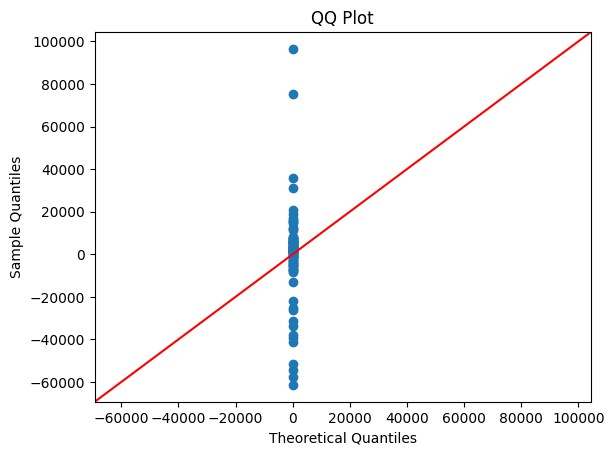

In [20]:
# Definisikan variabel dependen (y) dan tambahkan variabel dummy Idul Fitri dan Time
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyIdulFitri']]

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(insample['diff'], X_insample).fit()

# Mengambil residual dari model
residuals = model.resid

# Uji Heteroskedastisitas menggunakan Uji Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X_insample)
print('Uji Breusch-Pagan:')
print(f'  Statistik: {bp_test[0]:.4f}')
print(f'  p-value: {bp_test[1]:.4f}')

# Evaluasi hasil uji heteroskedastisitas
if bp_test[1] < 0.05:
  print('  Indikasi heteroskedastisitas')
else:
  print('  Tidak ada indikasi heteroskedastisitas')

# Uji Autokorelasi Residual menggunakan Uji Durbin-Watson
dw_test = sm.stats.durbin_watson(residuals)
print(f'Uji Durbin-Watson: {dw_test:.4f}')

# Evaluasi hasil uji autokorelasi
if dw_test < 1.5:
    print('  Indikasi autokorelasi positif')
elif dw_test > 2.5:
    print('  Indikasi autokorelasi negatif')
else:
    print('  Tidak ada indikasi autokorelasi')

# Visualisasi Normalitas dengan QQ plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot')
plt.show()
# Keputusan QQ Plot: Periksa apakah titik-titik berada di sepanjang garis 45 derajat. Jika tidak, ini menunjukkan deviasi dari normalitas.

# Evaluasi Akurasi Model

In [21]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Definisikan variabel dependen (y) dan tambahkan variabel dummy Idul Fitri dan Time untuk insample
insample['diff'] = y_insample.diff().dropna()
X_insample = insample[['Time', 'DummyIdulFitri']]

# Convert relevant columns to numeric types and handle NaN
X_insample = X_insample.apply(pd.to_numeric, errors='coerce').fillna(0)
insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_insample = sm.add_constant(X_insample)

# Membuat model regresi tren
model = sm.OLS(y_insample, X_insample).fit()

# Prediksi untuk data insample
y_pred_insample = model.predict(X_insample)

# Evaluasi model untuk insample
mae = mean_absolute_error(insample['diff'], y_pred_insample)
mse = mean_squared_error(insample['diff'], y_pred_insample)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_insample, y_pred_insample)

print('Evaluasi Model (Insample):')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')

# Definisikan variabel dependen (y) dan tambahkan variabel dummy Idul Fitri dan Time untuk outsample
y_outsample = outsample['Jumlah Keberangkatan Penumpang']
X_outsample = outsample[['Time', 'DummyIdulFitri']]

# Convert relevant columns to numeric types and handle NaN
X_outsample = X_outsample.apply(pd.to_numeric, errors='coerce').fillna(0)
y_outsample = pd.to_numeric(y_outsample, errors='coerce').fillna(0)

# Menambahkan konstanta ke dalam model regresi
X_outsample = sm.add_constant(X_outsample)

# Prediksi untuk data outsample
y_pred_outsample = model.predict(X_outsample)

# Evaluasi model untuk outsample
mae_outsample = mean_absolute_error(y_outsample, y_pred_outsample)
mse_outsample = mean_squared_error(y_outsample, y_pred_outsample)
rmse_outsample = np.sqrt(mse_outsample)
mape_outsample = mean_absolute_percentage_error(y_outsample, y_pred_outsample)

print('Evaluasi Model (Outsample):')
print(f'MAE: {mae_outsample:.2f}')
print(f'MSE: {mse_outsample:.2f}')
print(f'RMSE: {rmse_outsample:.2f}')
print(f'MAPE: {mape_outsample:.2%}')


Evaluasi Model (Insample):
MAE: 28425.93
MSE: 1094850289.14
RMSE: 33088.52
MAPE: 70.48%
Evaluasi Model (Outsample):
MAE: 33869.76
MSE: 1669766966.66
RMSE: 40862.78
MAPE: 54.09%


<ipython-input-21-565be333ed31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = y_insample.diff().dropna()
<ipython-input-21-565be333ed31>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insample['diff'] = pd.to_numeric(insample['diff'], errors='coerce').fillna(0)
